In [1]:
# Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d import Axes3D

from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')   # to avoid warnings

In [2]:
# reading data into dataframe
data = pd.read_excel('Credit Card Customer Data.xlsx', sheet_name='Sheet1')

##### Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data. (10 marks)

In [3]:
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [4]:
data.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [5]:
data.shape

(660, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [7]:
data.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [8]:
data.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [9]:
data.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [10]:
## Remove Sl_No and Customer Key since it doesn't add value for the clustering

data.drop(['Sl_No', 'Customer Key'],  axis=1, inplace=True)

In [11]:
# Finding duplicates in the records

duplicate = data[data.duplicated()] 
print(duplicate)

# drop duplicates
data=data.drop_duplicates()
data.shape

     Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
162              8000                   2                  0   
175              6000                   1                  0   
215              8000                   4                  0   
295             10000                   6                  4   
324              9000                   4                  5   
361             18000                   6                  3   
378             12000                   6                  5   
385              8000                   7                  4   
395              5000                   4                  5   
455             47000                   6                  2   
497             52000                   4                  2   

     Total_visits_online  Total_calls_made  
162                    3                 4  
175                    2                 5  
215                    4                 7  
295                    2                 3  
324   

(649, 5)

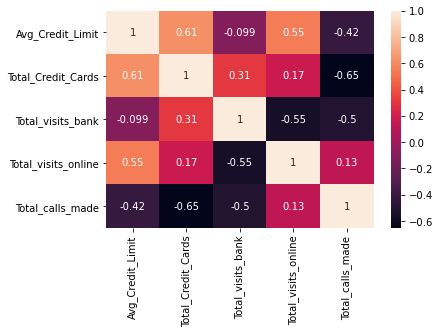

In [12]:
# plotting heatmap

corr = data.corr()
sns.heatmap(corr, annot = True)
plt.show()

#### Inferences based on the heatmap:
1. Avg credit limit is positively correlated with total credit cards and total visits online.
2. Avg credit limit is negatively correlated with total calls made and total visits to the bank
3. Total credit cards is negatively correlated with total calls made
4. Total visits online and total calls made are negatively correlated with total visits in the bank.

In [13]:
# Statistical summary

data.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,649.0,34878.274268,37813.736638,3000.0,11000.0,18000.0,49000.0,200000.0
Total_Credit_Cards,649.0,4.708783,2.173763,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,649.0,2.397535,1.625148,0.0,1.0,2.0,4.0,5.0
Total_visits_online,649.0,2.624037,2.952888,0.0,1.0,2.0,4.0,15.0
Total_calls_made,649.0,3.590139,2.877911,0.0,1.0,3.0,5.0,10.0


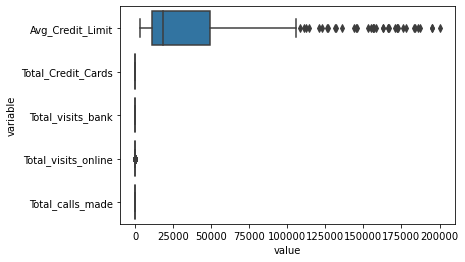

In [14]:
# Plotting Boxplots of all our features to get idea of distribution and outliers

sns.boxplot(x="value", y="variable", data=pd.melt(data))
plt.show()

# Only Avg Credit Limit has outliers, and It seems to be natural

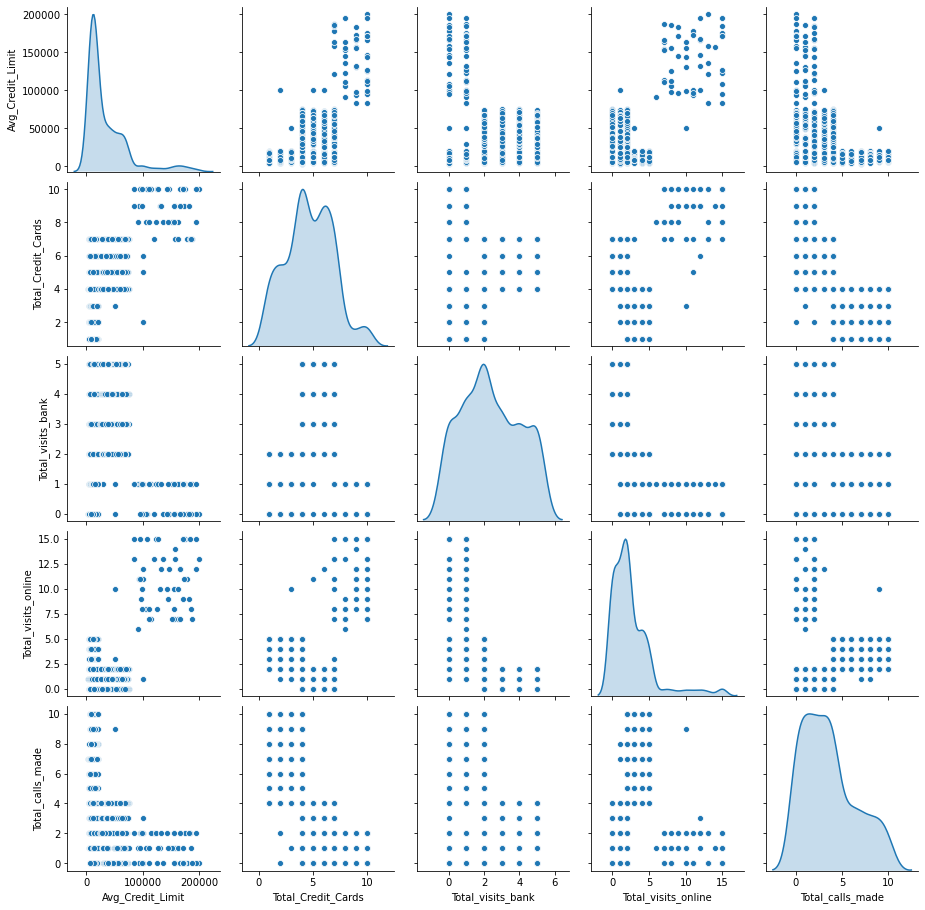

In [15]:
# Create pair plot

sns.pairplot(data, diag_kind='kde')
plt.show()

#### Observations
1. Most of the attributes have 3 or more peaks.
2. Total_calls_made shows two peaks.
3. Total_Visit_bank shows 2 clusters and Total_visits_online shows 3.
4. Based on the plots, we can work with 2 or 3 clusters.
5. Total credit cards seems to have 4 peaks

#### Properly comment on the codes, provide explanations of the steps taken in the notebook and conclude your insights from the graphs. (5 marks)

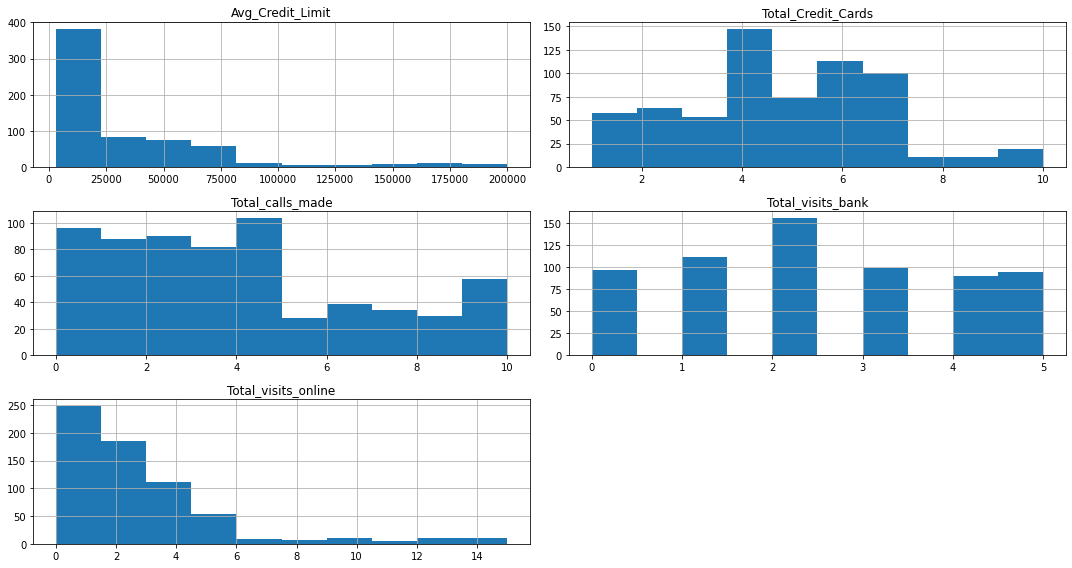

In [16]:
# Already provided many observations above

data[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made']].hist(figsize=(15,8))
plt.tight_layout()
plt.show()

1. Pair-plot above gave good insights between the relation b/w each attributes
2. Total visits online vs total calls made clearly shows 4 clusters
3. Most of the attributes have 3 or more peaks.
4. Total_calls_made shows two peaks.
5. Total_Visit_bank shows 2 clusters and Total_visits_online shows 3.
6. Based on the plots, we can work with 2 or 3 clusters.
7. Avg credit limit is positively correlated with total credit cards and total visits online.
8. Avg credit limit is negatively correlated with total calls made and total visits to the bank
9. Total credit cards is negatively correlated with total calls made
10. Total visits online and total calls made are negatively correlated with total visits in the bank.
11. Total visits online and total calls made are negatively correlated with total visits in the bank.
12. Total credit cards seems to have 4 peaks.

#### Execute K-means clustering use elbow plot and analyse clusters using boxplot (10 marks)

In [17]:
# Scale the data
from scipy.stats import zscore

data_z = data.apply(zscore) 

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

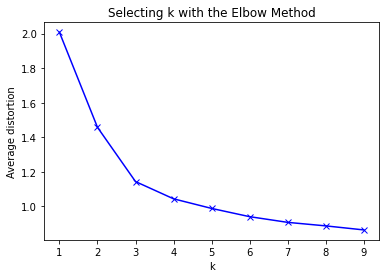

In [18]:
# Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(data_z)
    prediction=model.predict(data_z)
    meanDistortions.append(sum(np.min(cdist(data_z, model.cluster_centers_, 'euclidean'), axis=1)) / data_z
                           .shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

# Fall is sharp at K=3 and it seems to be the right point 
# where the graph deflects and will be used for further analysis

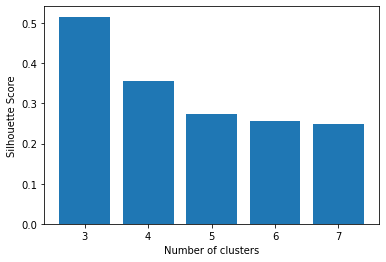

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []

for n_cluster in range(3, 8):
    silhouette_scores.append( 
        silhouette_score(data_z, KMeans(n_clusters = n_cluster).fit_predict(data_z))) 
    
# Plotting a bar graph to compare the results 
k = [3, 4, 5, 6, 7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

# Silhouette score at K=3 is the highest

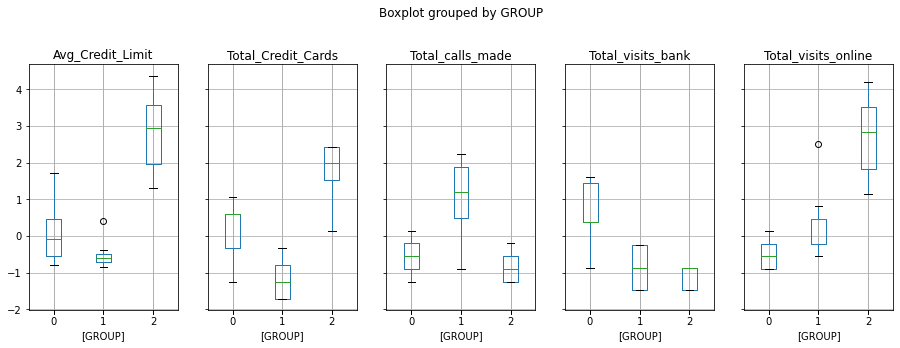

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,34071.428571,5.518519,3.484127,0.981481,1.992063
1,12239.819005,2.411765,0.945701,3.561086,6.891403
2,141040.000000,8.740000,0.600000,10.900000,1.080000


In [20]:
# Trying with K = 3

k3_datamodel=KMeans(3)
k3_datamodel.fit(data_z)
prediction=k3_datamodel.predict(data_z)

# Appending the prediction
data_z['GROUP'] = prediction
data['GROUP'] = prediction
data_z.boxplot(by = 'GROUP',  layout=(2,5), figsize=(15, 10))
plt.show()

data_uselater = data.copy()
data_z_uselater = data_z.copy()

dfcluster = data.groupby(['GROUP'])
dfcluster.mean()

# Each attribute is clearly seen as separate in each group

##### There are 3 distinct clusters of data points below:
1. Cluster 0 with 5-6 credit cards and appx. 34000 average credit limit, and prefer visiting to the bank for customer service.
2. Cluster 1 with about 2-3 credit cards, and average credit limit of little above 12200, and they prefer making calls to customer services.
3. Cluster 2 with highest number of credit cards (around 8-9) and average credit limit of 141040 who interact with customer service using online method most of the time

Text(0.5, 0.92, '3D plot of KMeans Clustering')

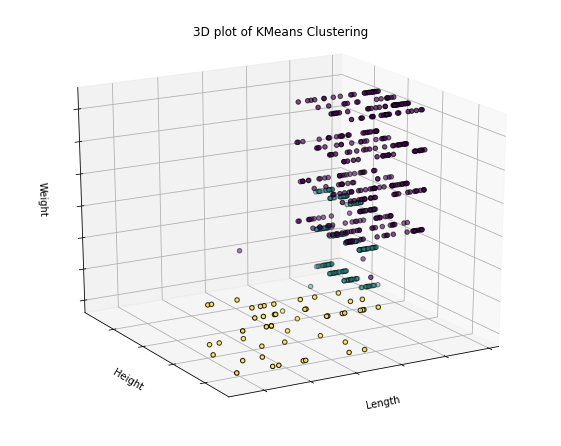

In [21]:
# 3D plots of clusters K = 3

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
k3_datamodel=KMeans(3)
k3_datamodel.fit(data_z)
labels = k3_datamodel.labels_
ax.scatter(data_z.iloc[:, 0], data_z.iloc[:, 1], data_z.iloc[:, 2],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')

In [22]:
# checking the number of data in each cluster

labels = k3_datamodel.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[378 221  50]


In [23]:
# Checking the centers in each group

centroids = k3_datamodel.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(data_z) )
centroid_df.transpose()

,0,1,2
Avg_Credit_Limit,-2.135383e-02,-0.599145,2.809656
Total_Credit_Cards,3.727914e-01,-1.057516,1.855918
Total_visits_bank,6.691271e-01,-0.894044,-1.106928
Total_visits_online,-5.566830e-01,0.317578,2.804830
Total_calls_made,-5.557183e-01,1.147989,-0.872881
GROUP,-1.498801e-15,1.000000,2.000000


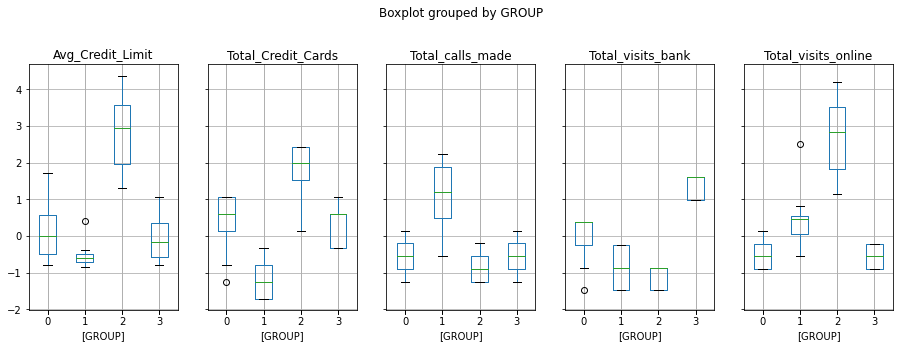

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,36108.247423,5.541237,2.484536,0.958763,2.036082
1,12227.272727,2.409091,0.950000,3.572727,6.918182
2,141040.000000,8.740000,0.600000,10.900000,1.080000
3,31832.432432,5.481081,4.513514,1.005405,1.940541


In [24]:
# Trying with K = 4

k4_datamodel=KMeans(4)
k4_datamodel.fit(data_z)
prediction=k4_datamodel.predict(data_z)

# Appending the prediction
data_z['GROUP'] = prediction
data['GROUP'] = prediction
data_z.boxplot(by = 'GROUP',  layout=(2,5), figsize=(15, 10))
plt.show()

dfcluster = data.groupby(['GROUP'])
dfcluster.mean()

# Each attribute is clearly seen as separate in each group
# It seems little similar to K = 3

In [25]:
# checking the number of data in each cluster

labels = k4_datamodel.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[194 220  50 185]


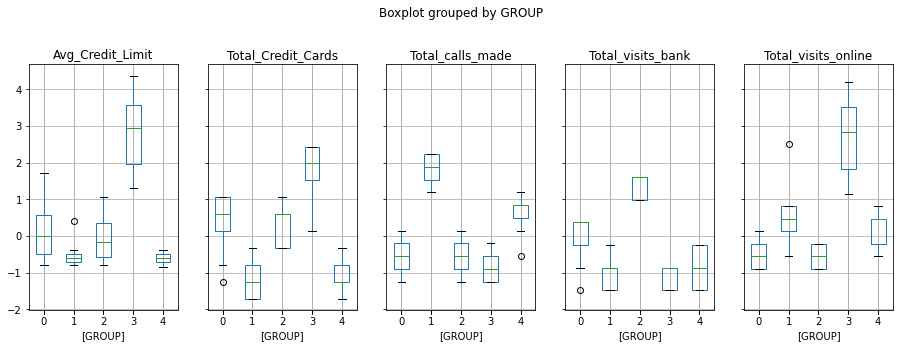

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,36108.247423,5.541237,2.484536,0.958763,2.036082
1,12505.376344,2.397849,0.817204,3.774194,8.849462
2,31832.432432,5.481081,4.513514,1.005405,1.940541
3,141040.000000,8.740000,0.600000,10.900000,1.080000
4,12023.622047,2.417323,1.047244,3.425197,5.503937


In [26]:
# Trying with K = 5

k5_datamodel=KMeans(5)
k5_datamodel.fit(data_z)
prediction=k5_datamodel.predict(data_z)

# Appending the prediction
data_z['GROUP'] = prediction
data['GROUP'] = prediction
data_z.boxplot(by = 'GROUP',  layout=(2,5), figsize=(15, 10))
plt.show()

dfcluster = data.groupby(['GROUP'])
dfcluster.mean()

# Each attribute is clearly seen as separate in each group

In [27]:
# checking the number of data in each cluster

labels = k5_datamodel.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[194  93 185  50 127]


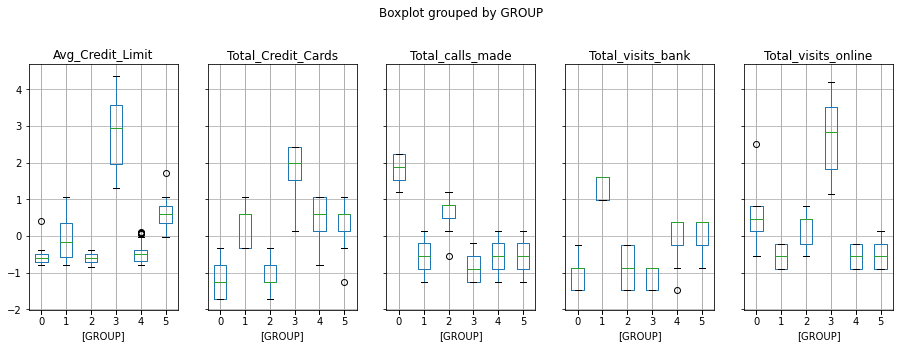

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,12505.376344,2.397849,0.817204,3.774194,8.849462
1,31832.432432,5.481081,4.513514,1.005405,1.940541
2,12023.622047,2.417323,1.047244,3.425197,5.503937
3,141040.000000,8.740000,0.600000,10.900000,1.080000
4,17267.326733,5.564356,2.485149,0.940594,1.821782
5,56569.892473,5.516129,2.483871,0.978495,2.268817


In [28]:
# Trying with K = 6

k6_datamodel=KMeans(6)
k6_datamodel.fit(data_z)
prediction=k6_datamodel.predict(data_z)

# Appending the prediction
data_z['GROUP'] = prediction
data['GROUP'] = prediction
data_z.boxplot(by = 'GROUP',  layout=(2,5), figsize=(15, 10))
plt.show()

dfcluster = data.groupby(['GROUP'])
dfcluster.mean()

# Each attribute is clearly seen as separate in each group
# There seems some overlapping in the behaviour and this also segments the customer properly into 6 groups.
# It seems little similar to K = 5
# K = 7 in the next run will not make sense

In [29]:
# checking the number of data in each cluster

labels = k6_datamodel.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[ 93 185 127  50 101  93]


Text(0.5, 0.92, '3D plot of KMeans Clustering')

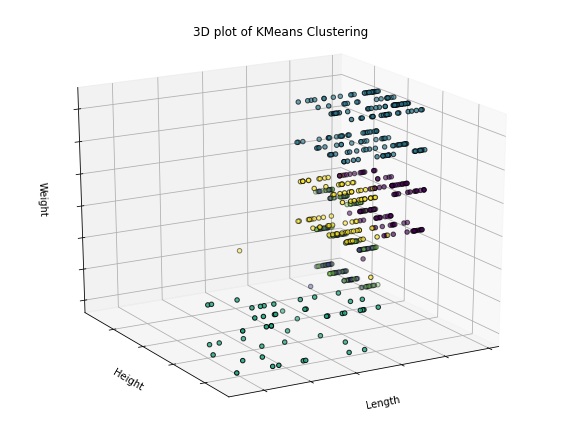

In [30]:
# 3D plots of clusters K = 6

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
k6_datamodel=KMeans(6)
k6_datamodel.fit(data_z)
labels = k6_datamodel.labels_
ax.scatter(data_z.iloc[:, 0], data_z.iloc[:, 1], data_z.iloc[:, 2],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')

#### Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot (15 marks)

In [31]:
data_z.head()

data.drop('GROUP', axis=1, inplace=True)
data_z.drop('GROUP', axis=1, inplace=True)

data_z.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.723499,-1.247087,-0.860606,-0.550407,-1.248443
1,0.400209,-0.786701,-1.476410,2.499808,1.881237
2,0.400209,1.054846,-0.860606,0.127419,0.142526
3,-0.129107,0.134072,-0.860606,-0.550407,0.142526
4,1.723499,0.594459,-1.476410,3.177634,-0.205216


(648, 4)
cophenetic coeff is 0.7395135051413775  for the linkage  single


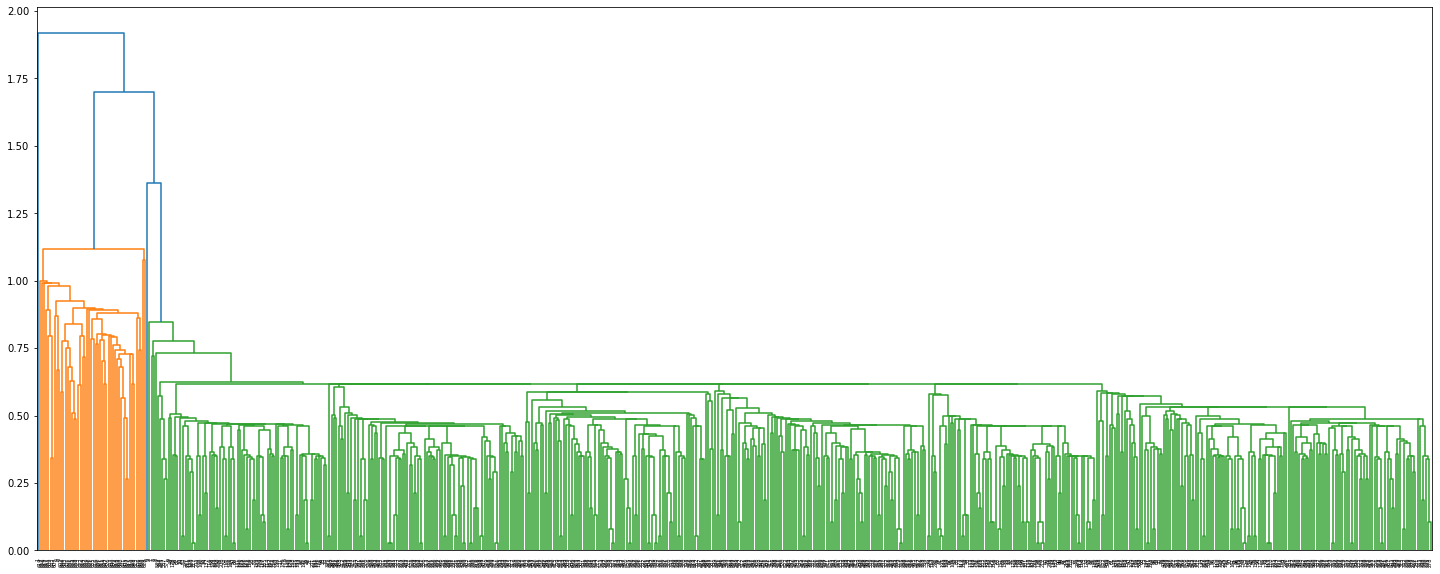

(648, 4)
cophenetic coeff is 0.8794736468795109  for the linkage  complete


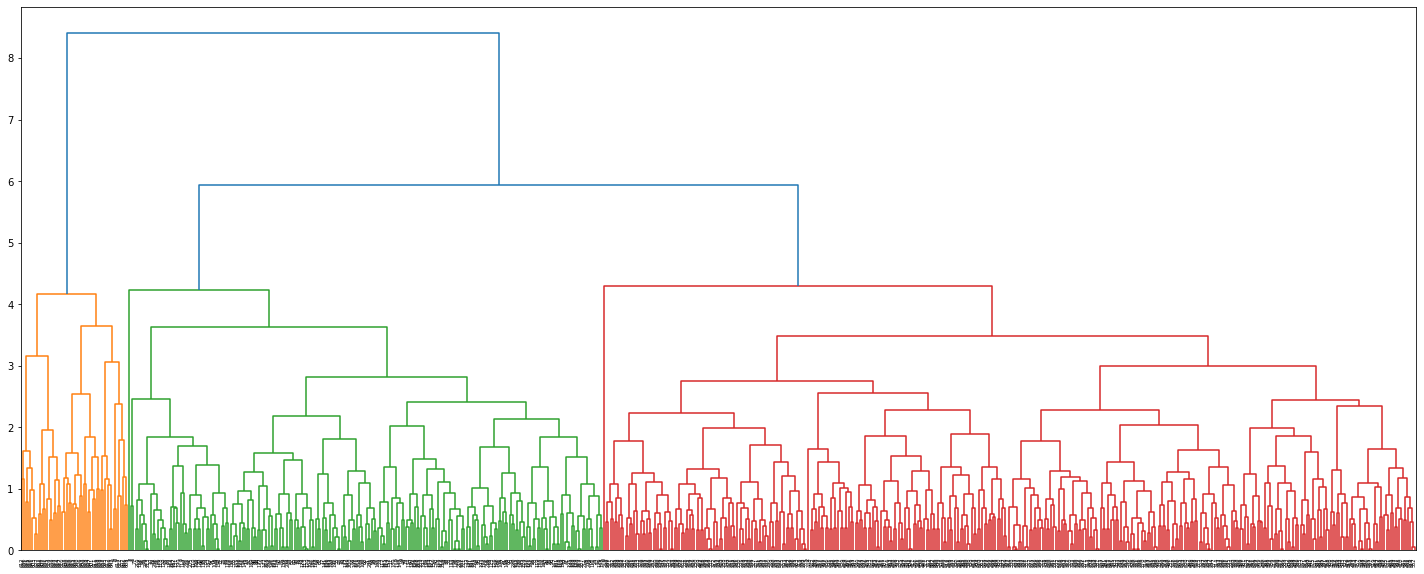

(648, 4)
cophenetic coeff is 0.8974425535306298  for the linkage  average


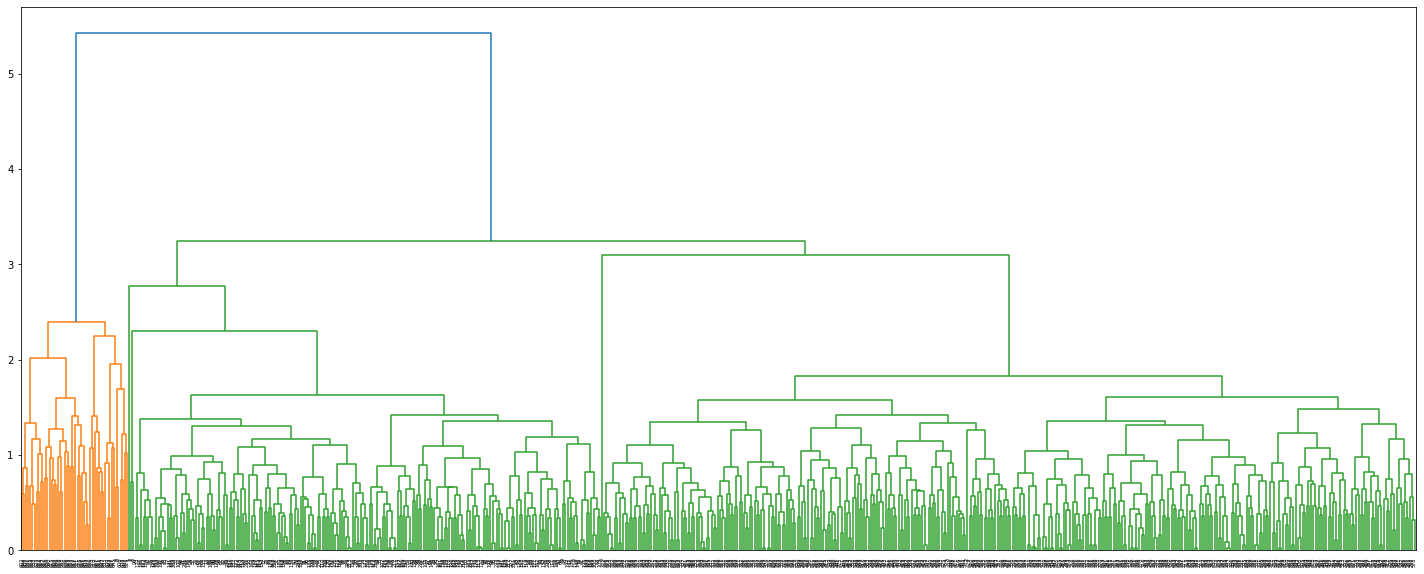

(648, 4)
cophenetic coeff is 0.894471288720818  for the linkage  centroid


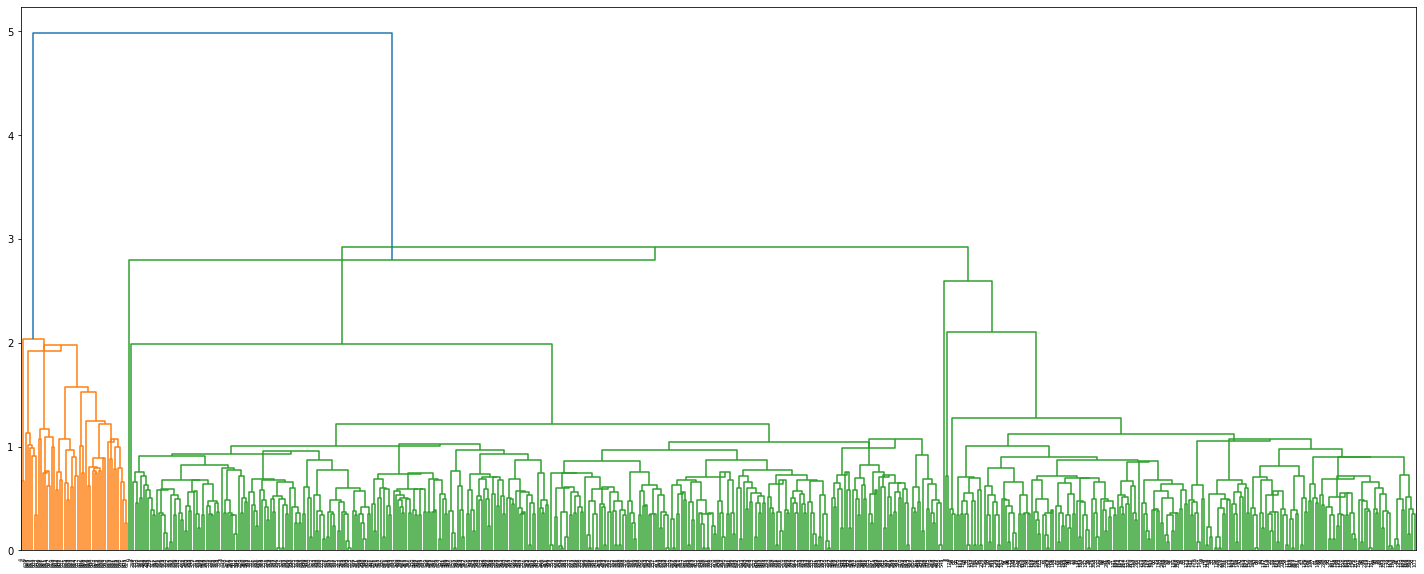

(648, 4)
cophenetic coeff is 0.8806884020604272  for the linkage  median


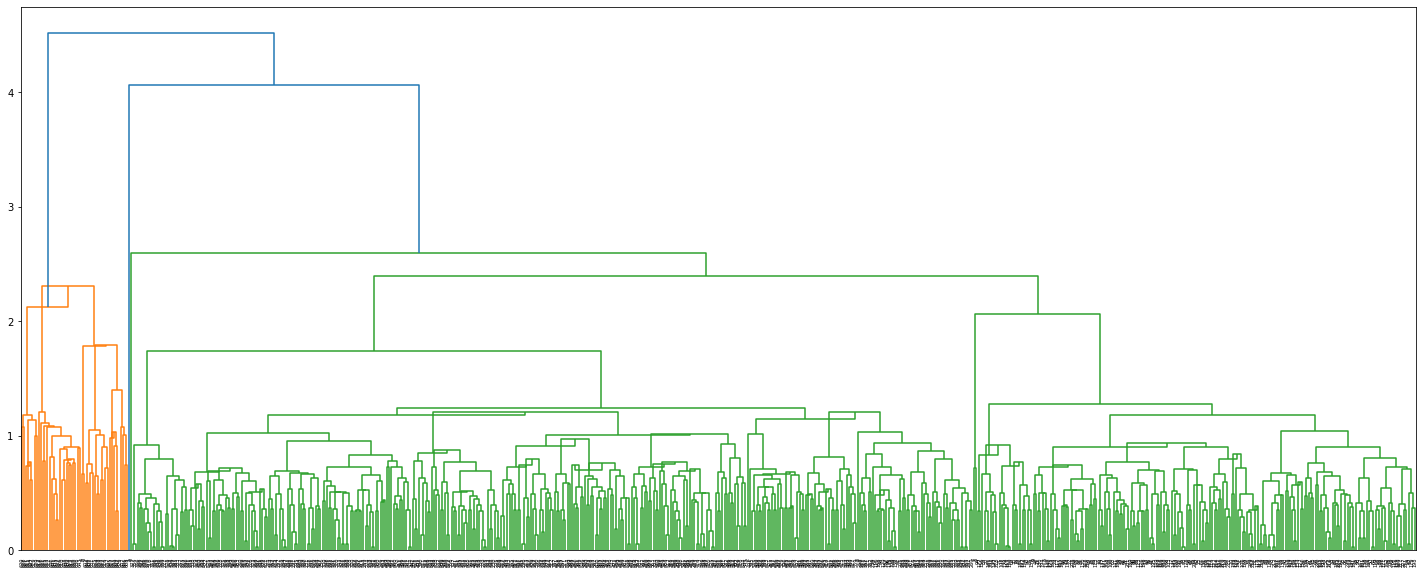

(648, 4)
cophenetic coeff is 0.7425813590948763  for the linkage  ward


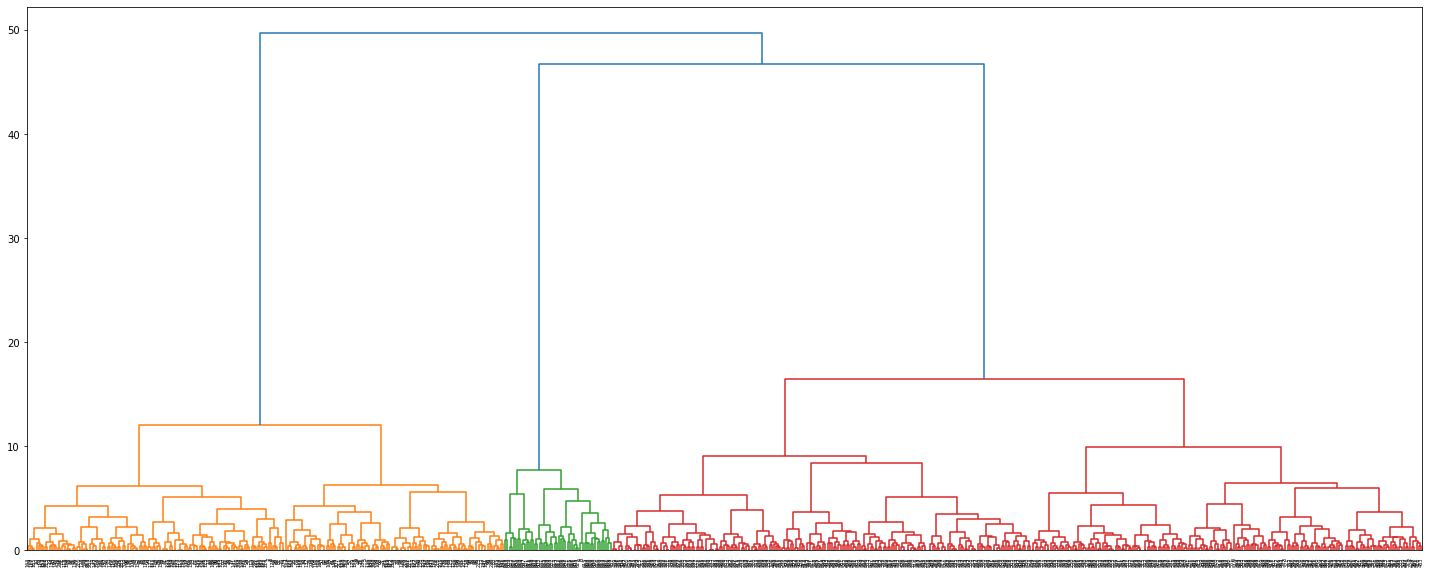

(648, 4)
cophenetic coeff is 0.8551098644586315  for the linkage  weighted


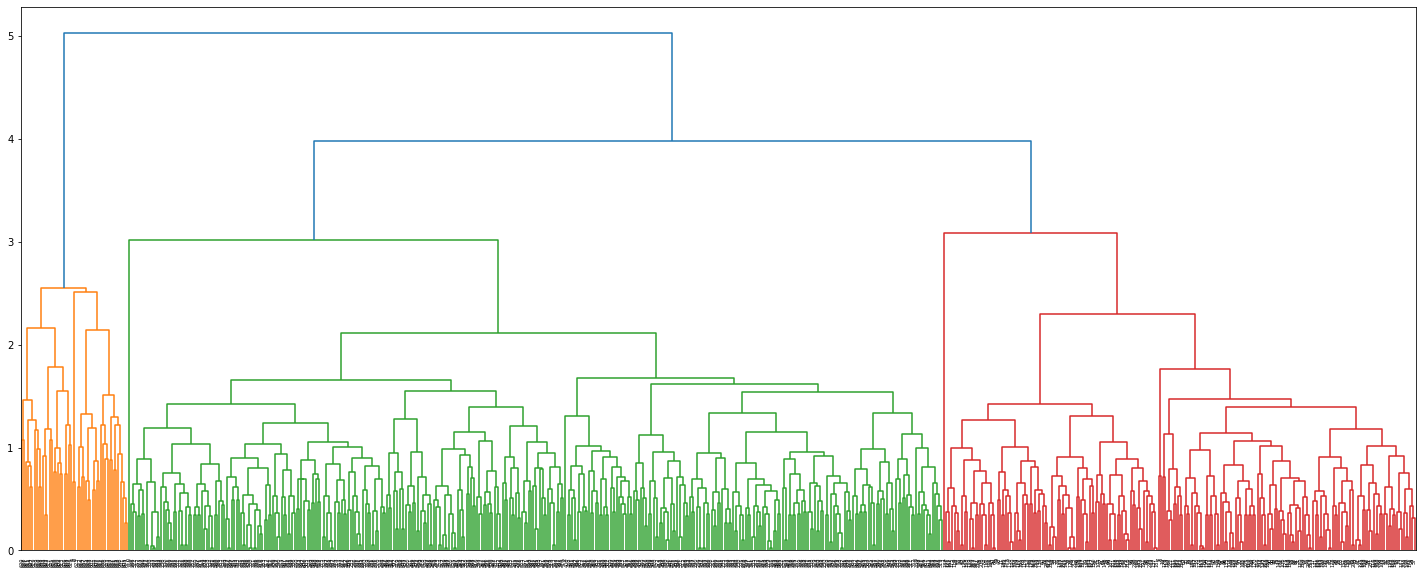

In [32]:
# data_z = data.apply(zscore)

LINKAGE_METHODS = ['single', 'complete', 'average', 'centroid',
                    'median', 'ward', 'weighted']
for linkage_method in LINKAGE_METHODS:
    Z = linkage(data_z, method=linkage_method, metric='euclidean')
    print(Z.shape)
    
    c, coph_dists = cophenet(Z, pdist(data_z))
    print('cophenetic coeff is',c, ' for the linkage ', linkage_method)
    
    plt.figure(figsize=(25, 10))
    dendrogram(Z)
    plt.show()

#### Observations 

Cophenetic coeff is 0.7395135051413775  for the linkage  Single <br />
Cophenetic coeff is 0.8794736468795109  for the linkage  Complete <br />
Cophenetic coeff is 0.8974425535306298  for the linkage  Average <br />
Cophenetic coeff is 0.8944712887208180  for the linkage  Centroid <br />
Cophenetic coeff is 0.8806884020604272  for the linkage  Median <br />
Cophenetic coeff is 0.7425813590948763  for the linkage  Ward <br />
Cophenetic coeff is 0.8551098644586315  for the linkage  Weighted <br />


<strong>Note</strong>: The output value, c, is the cophenetic correlation coefficient. The magnitude of this value should be very close to 1 for a high-quality solution. <br />

Centroid, Median, Average, and Complete linkages are performing good.

AgglomerativeClustering(linkage='complete', n_clusters=3)


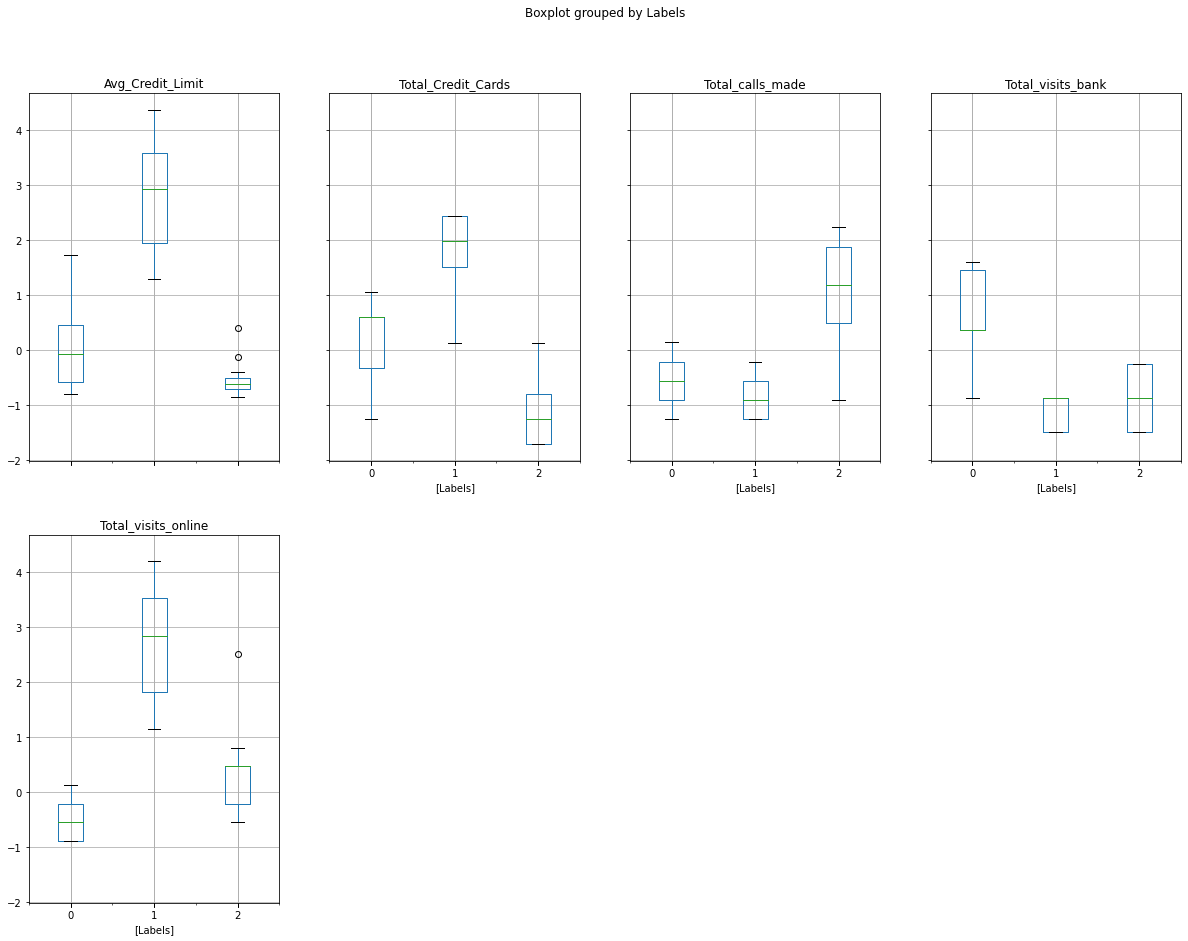

0    378
2    221
1     50
Name: Labels, dtype: int64
AgglomerativeClustering(linkage='average', n_clusters=3)


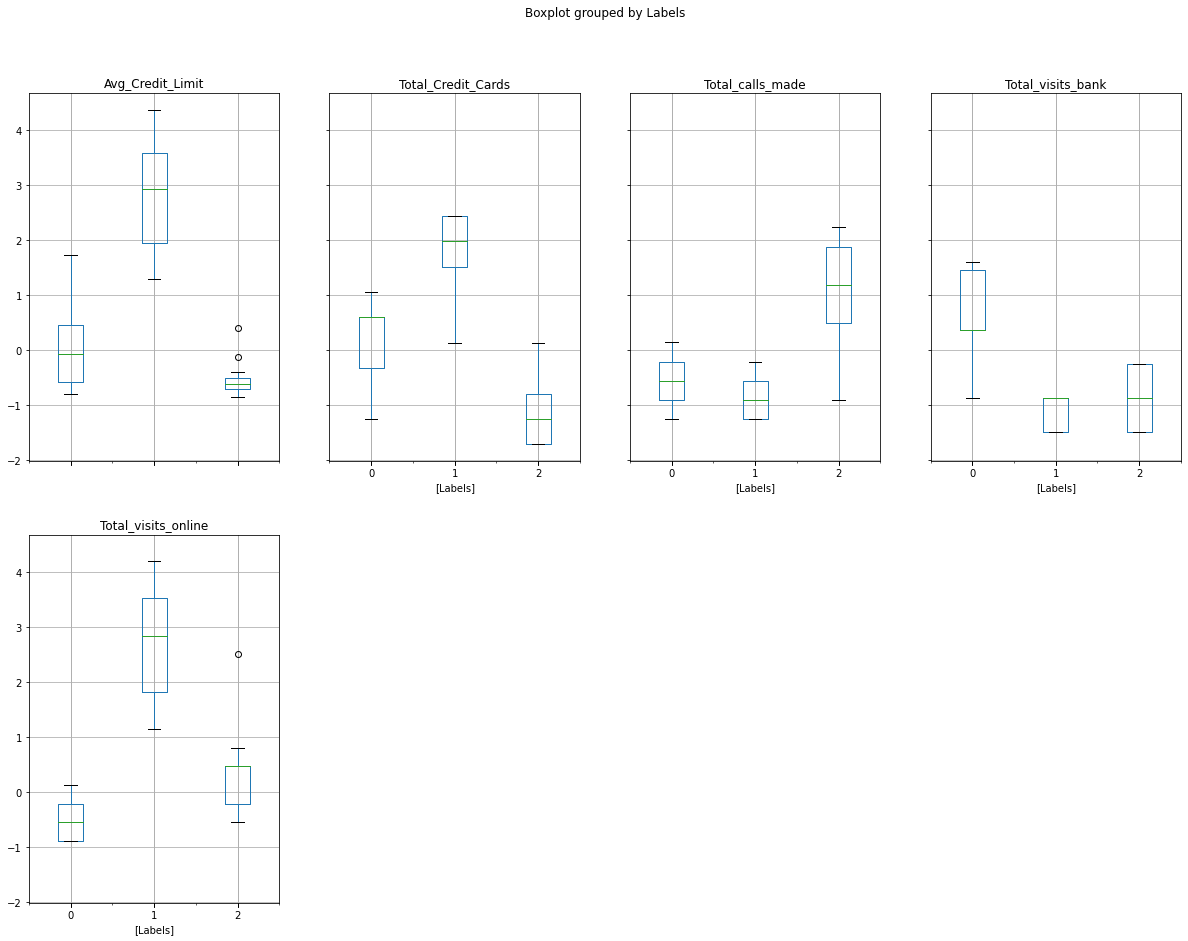

0    378
2    221
1     50
Name: Labels, dtype: int64
AgglomerativeClustering(linkage='complete', n_clusters=4)


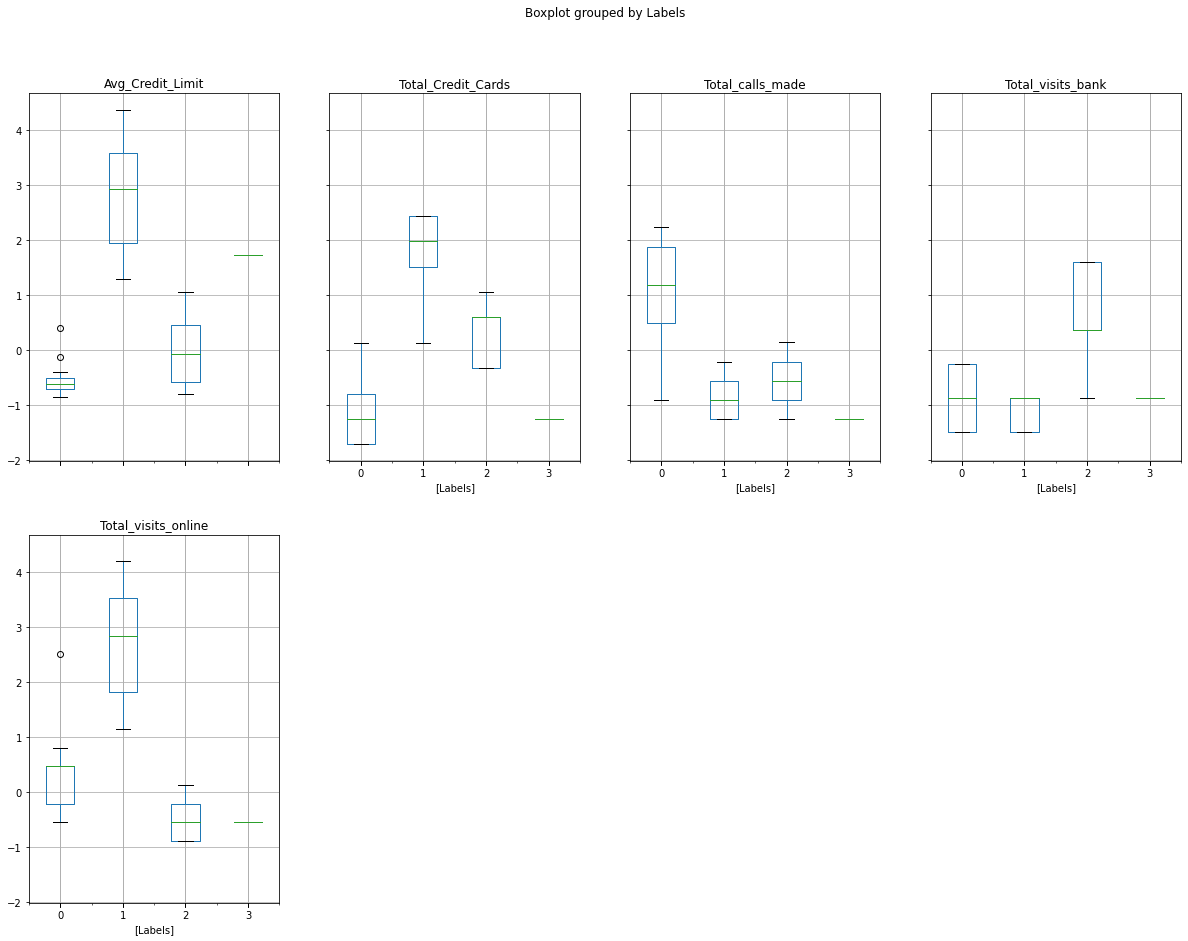

2    377
0    221
1     50
3      1
Name: Labels, dtype: int64
AgglomerativeClustering(linkage='average', n_clusters=4)


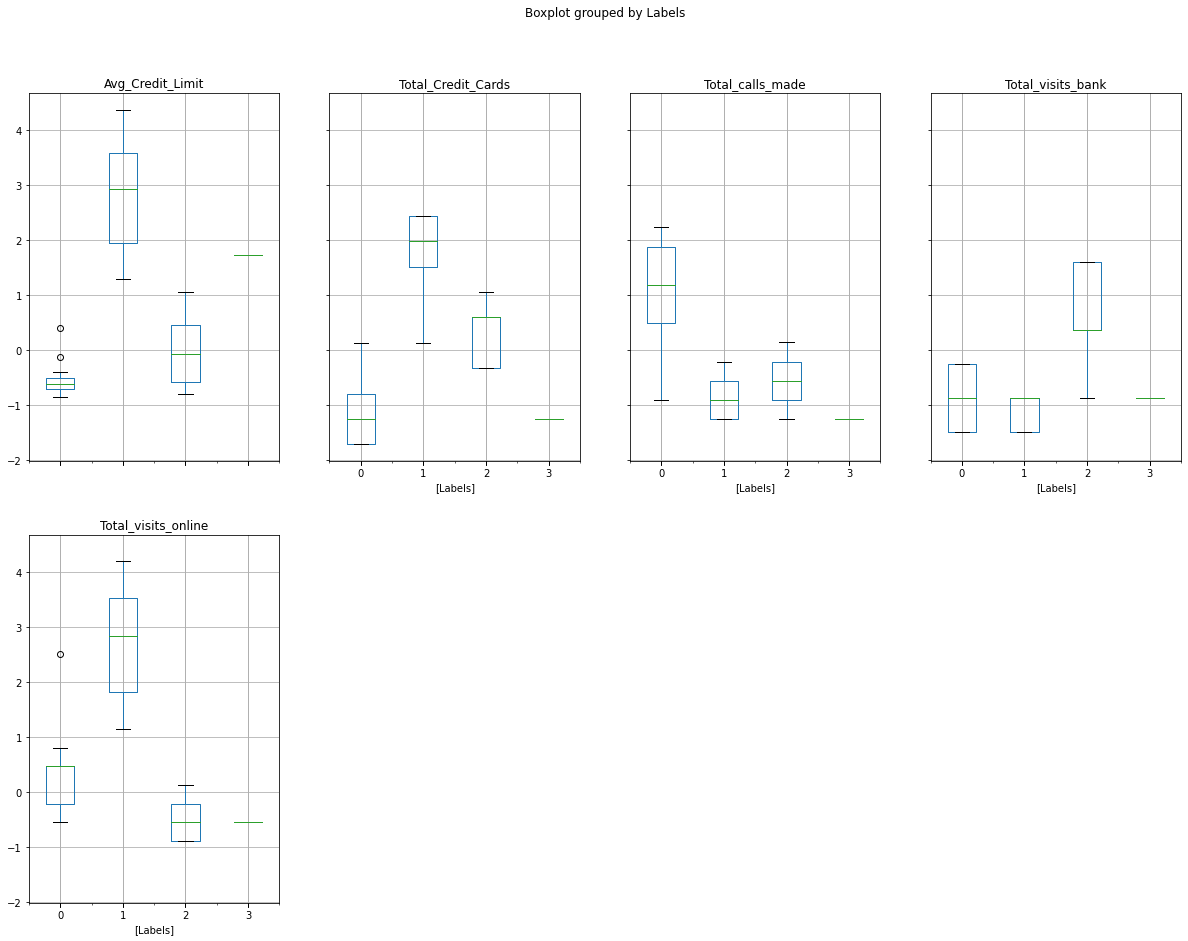

2    377
0    221
1     50
3      1
Name: Labels, dtype: int64
AgglomerativeClustering(linkage='complete', n_clusters=5)


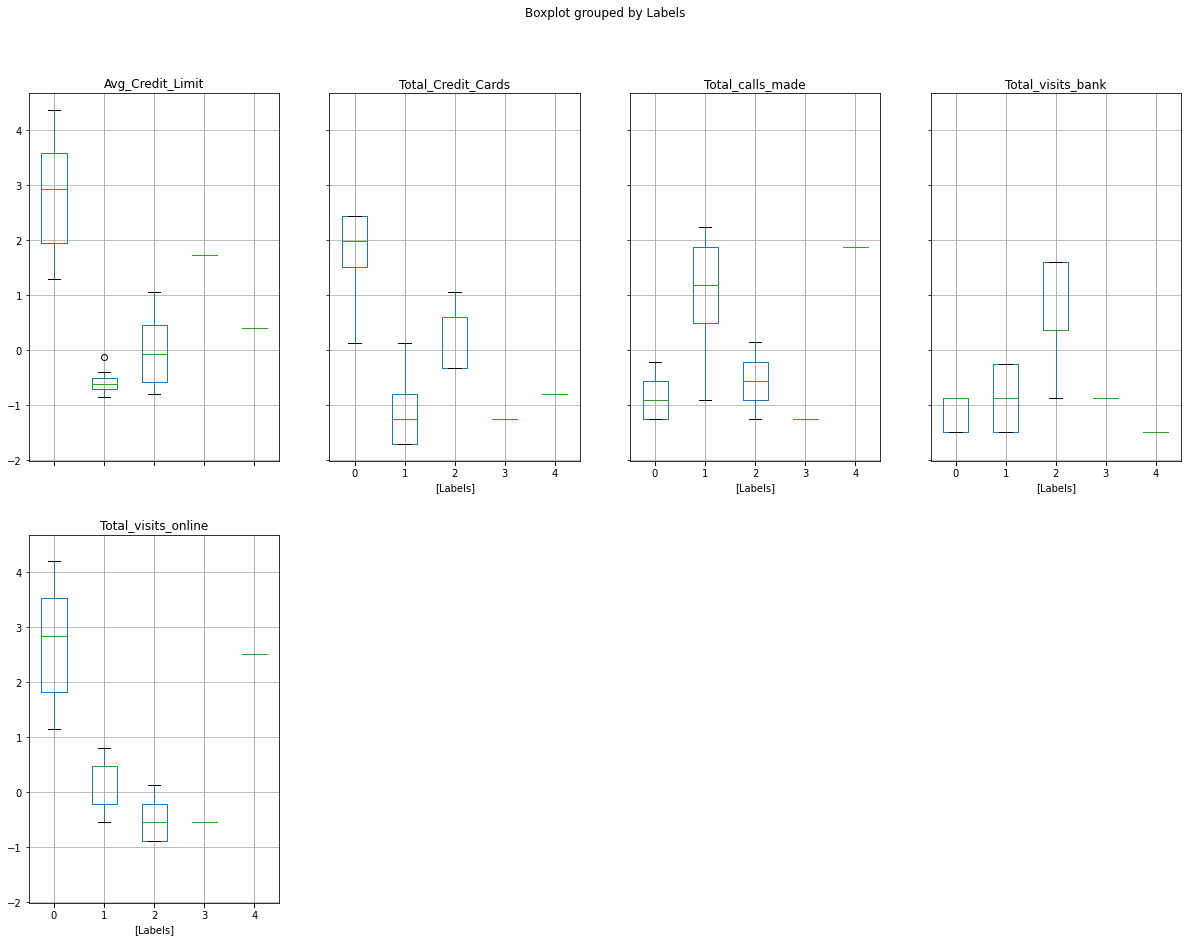

2    377
1    220
0     50
4      1
3      1
Name: Labels, dtype: int64
AgglomerativeClustering(linkage='average', n_clusters=5)


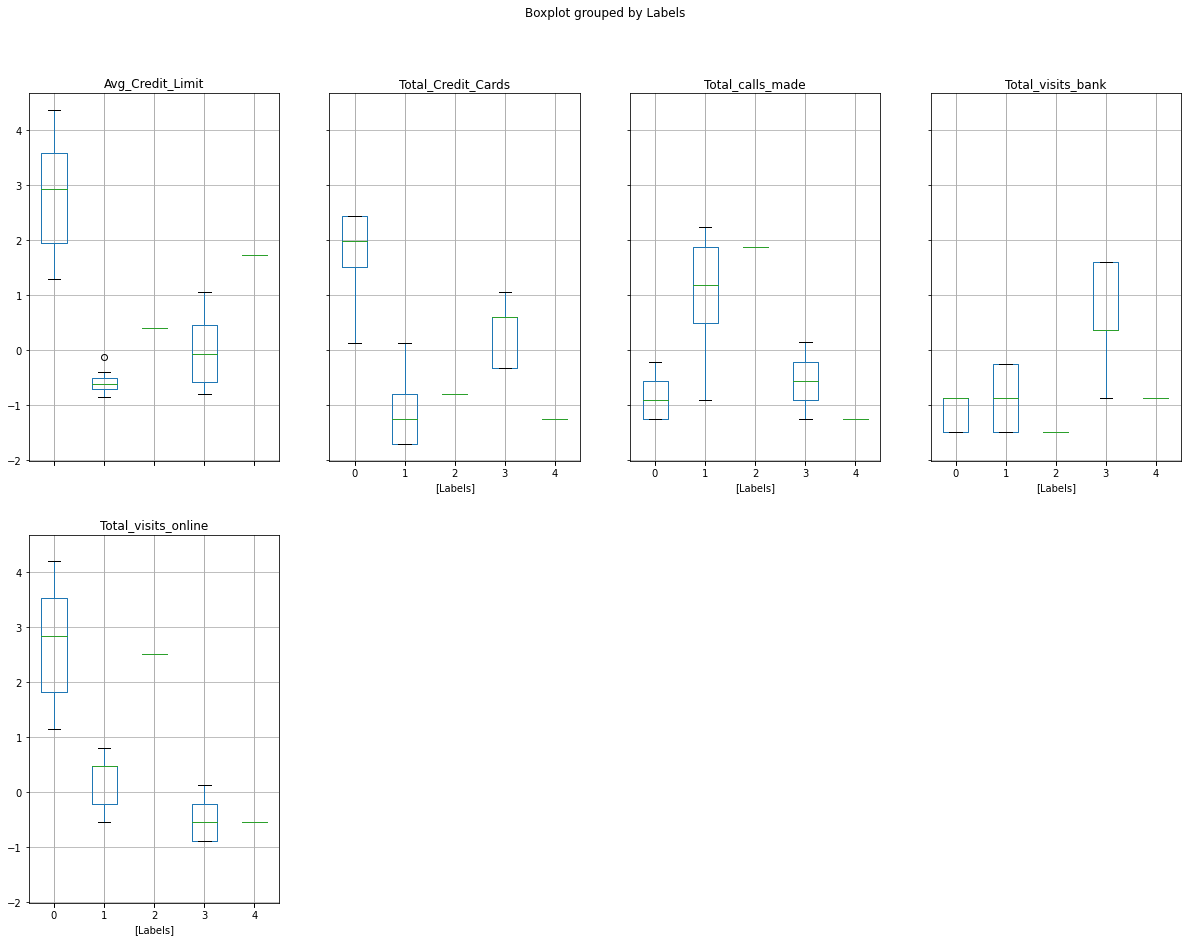

3    377
1    220
0     50
4      1
2      1
Name: Labels, dtype: int64
AgglomerativeClustering(linkage='complete', n_clusters=6)


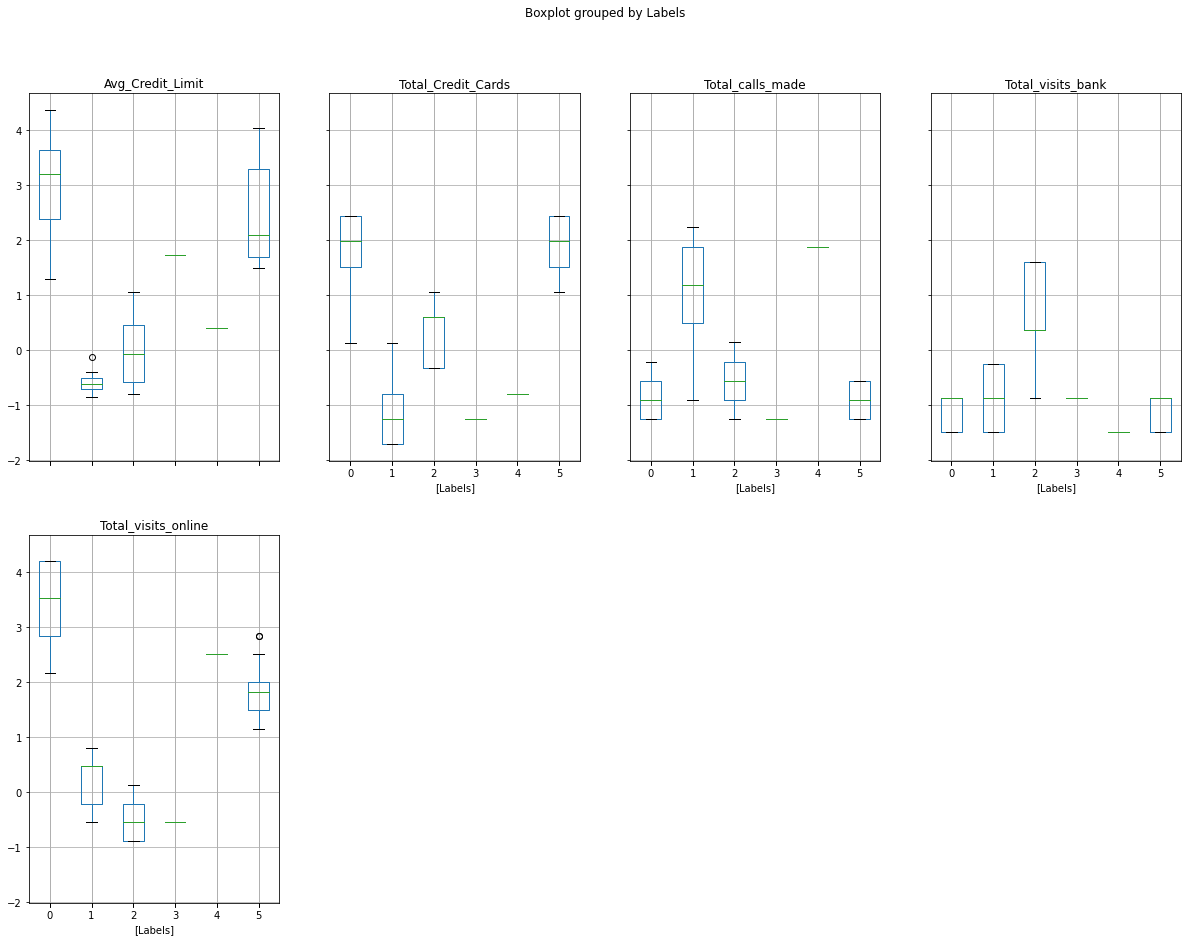

2    377
1    220
0     31
5     19
4      1
3      1
Name: Labels, dtype: int64
AgglomerativeClustering(linkage='average', n_clusters=6)


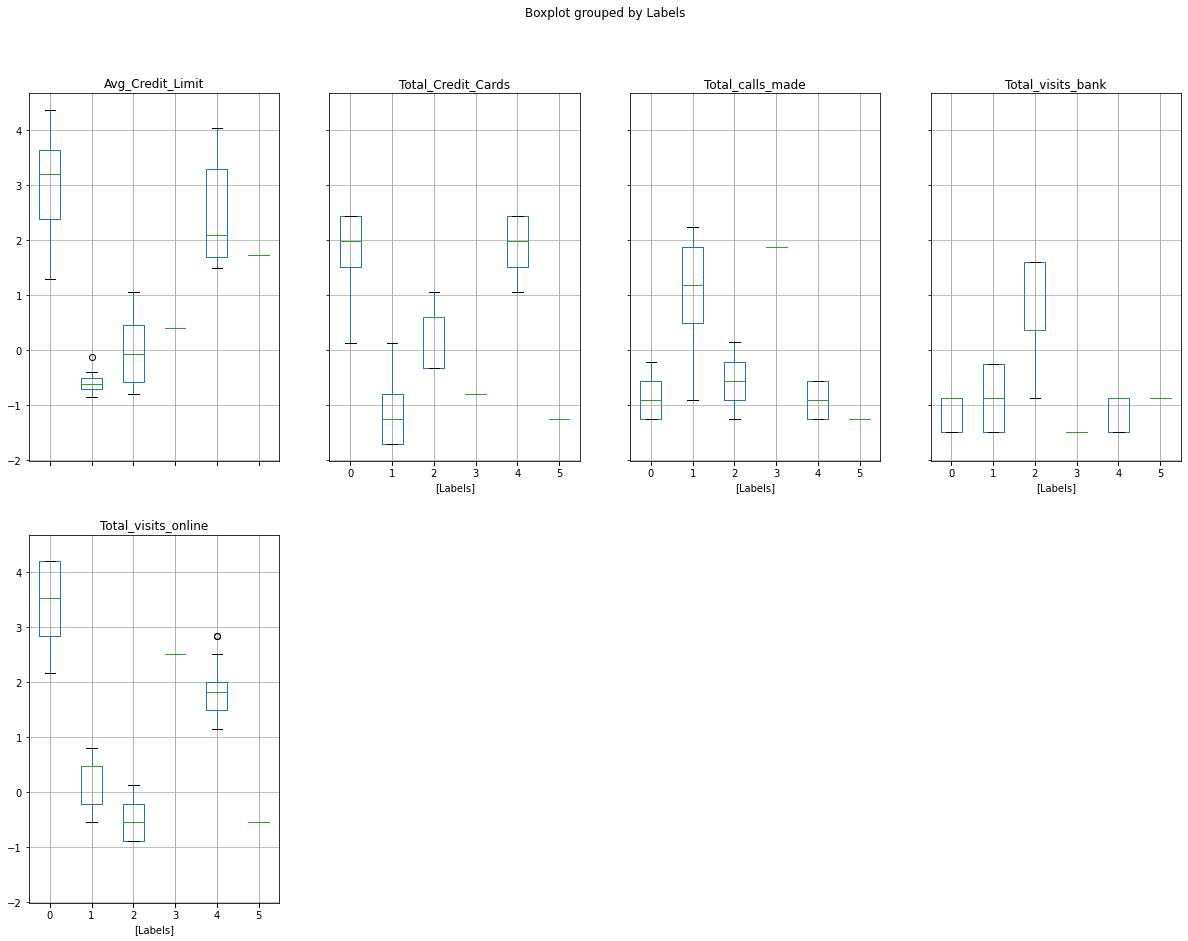

2    377
1    220
0     31
4     19
5      1
3      1
Name: Labels, dtype: int64


In [33]:
for cluster in range(3, 7):
    for linkage_method in ['complete' ,'average']:
        agglomerative = AgglomerativeClustering(linkage=linkage_method, affinity='euclidean',
                                                n_clusters=cluster)
        agglomerative.fit_predict(data_z)

        print(agglomerative)

        # Append the prediction
        data_z["Labels"] = agglomerative.labels_
        data_z.boxplot(by='Labels', layout=(2, 4), figsize=(20, 15))
        plt.show()
        print(data_z['Labels'].value_counts())

<strong> Group A: They seem to have avg_credit_limit, Total_credit_cards comparatively very high. They also prefer to perform online banking a lot, and bank visit js significantly less often. It appears that they are very active in the purchase and are the working class of society.<br /><br />
Group B: They seem to have avg_credit_limit , Total_credit_cards in an intermediate state. They prefer not to make many calls and have low online visits, but total visits to banks are significantly high. They are using cards in a pretty decent amount and prefer visiting branches often, but not that great in online work. So they could be the elderly citizen. <br /><br />
Group C: They seem to have avg_credit_limit, Total_credit_cards comparatively low. They also prefer making lots of calls to the bank; total visits to the bank and online visits are moderate. These customers are not much into using card but are more interested in knowing the offers by making calls. They could be students or not high earning individuals.</strong>

### Calculate average silhouette score for both methods. (5 marks)

In [34]:
# calculating for k-means with 3 to 6 clusters
from sklearn.metrics import silhouette_score
silhouette_list_kmeans=[]
for k in range(2, 10):
    model=KMeans(n_clusters=k, random_state=7).fit_predict(data_z)
    sil_score = metrics.silhouette_score(data_z, model, metric='euclidean')
    silhouette_list_kmeans.append((k, sil_score,  len(set(model))))

df_kmeans = pd.DataFrame(silhouette_list_kmeans,columns=['cluster', 'sil_score',  'number_of_clusters'])

print(df_kmeans)

   cluster  sil_score  number_of_clusters
0        2   0.435266                   2
1        3   0.524287                   3
2        4   0.540333                   4
3        5   0.369460                   5
4        6   0.275990                   6
5        7   0.261893                   7
6        8   0.253538                   8
7        9   0.246254                   9


In [35]:
# performing calculation for agglomerative clustering with 3 and 6 clusters based on silhouette score 3/ 4 is the best number of cluster

siliuette_list_hierarchical = []

for cluster in range(2,8,1):
    for linkage_method in ['ward', 'average', 'complete']:
        agglomerative = AgglomerativeClustering(linkage=linkage_method, affinity='euclidean',n_clusters=cluster).fit_predict(data_z)
        sil_score = metrics.silhouette_score(data_z, agglomerative, metric='euclidean')
        siliuette_list_hierarchical.append((cluster, sil_score, linkage_method, len(set(agglomerative)) ) )
        
df_hierarchical = pd.DataFrame(siliuette_list_hierarchical, columns=['cluster', 'sil_score','linkage_method', 'number_of_clusters'])

df_hierarchical.sort_values('sil_score', ascending=False)

,cluster,sil_score,linkage_method,number_of_clusters
2,2,0.570952,complete,2
1,2,0.567454,average,2
4,3,0.544324,average,3
5,3,0.544324,complete,3
8,4,0.540333,complete,4
6,4,0.539734,ward,4
11,5,0.539598,complete,5
13,6,0.528210,average,6
14,6,0.528210,complete,6
3,3,0.524287,ward,3


<strong>Based on silhouette values, cluster value of 3 provides the best results and value</strong>

### Compare K-means clusters with Hierarchical clusters. (5 marks)

In [ ]:
#### From the above analysis ####

# For K-Means

# cluster  sil_score  number_of_clusters
# 0        2   0.435266                   2
# 1        3   0.524287                   3
# 2        4   0.540333                   4
# 3        5   0.369460                   5
# 4        6   0.275990                   6
# 5        7   0.261893                   7
# 6        8   0.253538                   8
# 7        9   0.246254                   9

# =======================================================================

# For Hierarchical- Agglomerative

# cluster	sil_score	linkage_method	number_of_clusters
# 2	    0.570952	complete	    2
# 2	    0.567454	average	        2
# 3	    0.544324	average	        3
# 3	    0.544324	complete	    3
# 4	    0.540333	complete	    4
# 4	    0.539734	ward	        4
# 5	    0.539598	complete	    5
# 6	    0.528210	average	        6

# From the above we see that both K-means and Hierarchical is showing the max. silhuotte score with Cluster = 3 or 4

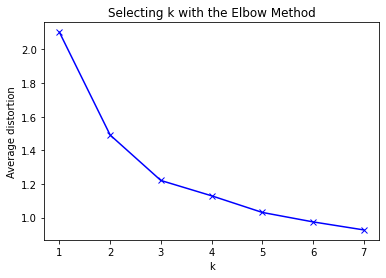

In [44]:
# Plotting the elbow plot again with k-means and dendogram with Hierarchical

clusters=range(1,8)
meanDistortions=[]
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(data_z)
    prediction=model.predict(data_z)
    meanDistortions.append(sum(np.min(cdist(data_z, model.cluster_centers_, 'euclidean'), axis=1)) / data_z
                           .shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

# K = 3 or K = 4 makes most sense

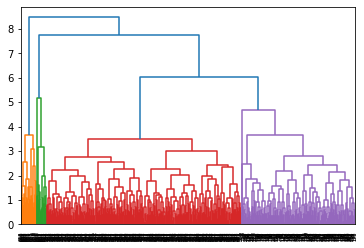

In [45]:
from scipy.cluster import hierarchy
    
dendrogram = hierarchy.dendrogram(hierarchy.linkage(data_z, method  = "complete"))

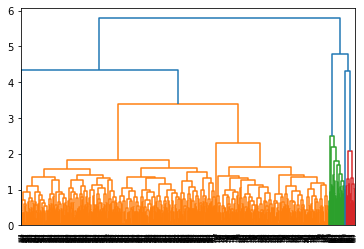

In [38]:
dendrogram = hierarchy.dendrogram(hierarchy.linkage(data_z, method  = "average"))

In [39]:
from scipy.cluster.hierarchy import cut_tree
merg = linkage(data_z, method='average')
HC_cluster_labels = cut_tree(merg, n_clusters=3).reshape(-1, )
# HC_cluster_labels

In [40]:
data_z_h = data_z.copy()
data_z_h["HierarchicalClusterlabels"] = HC_cluster_labels

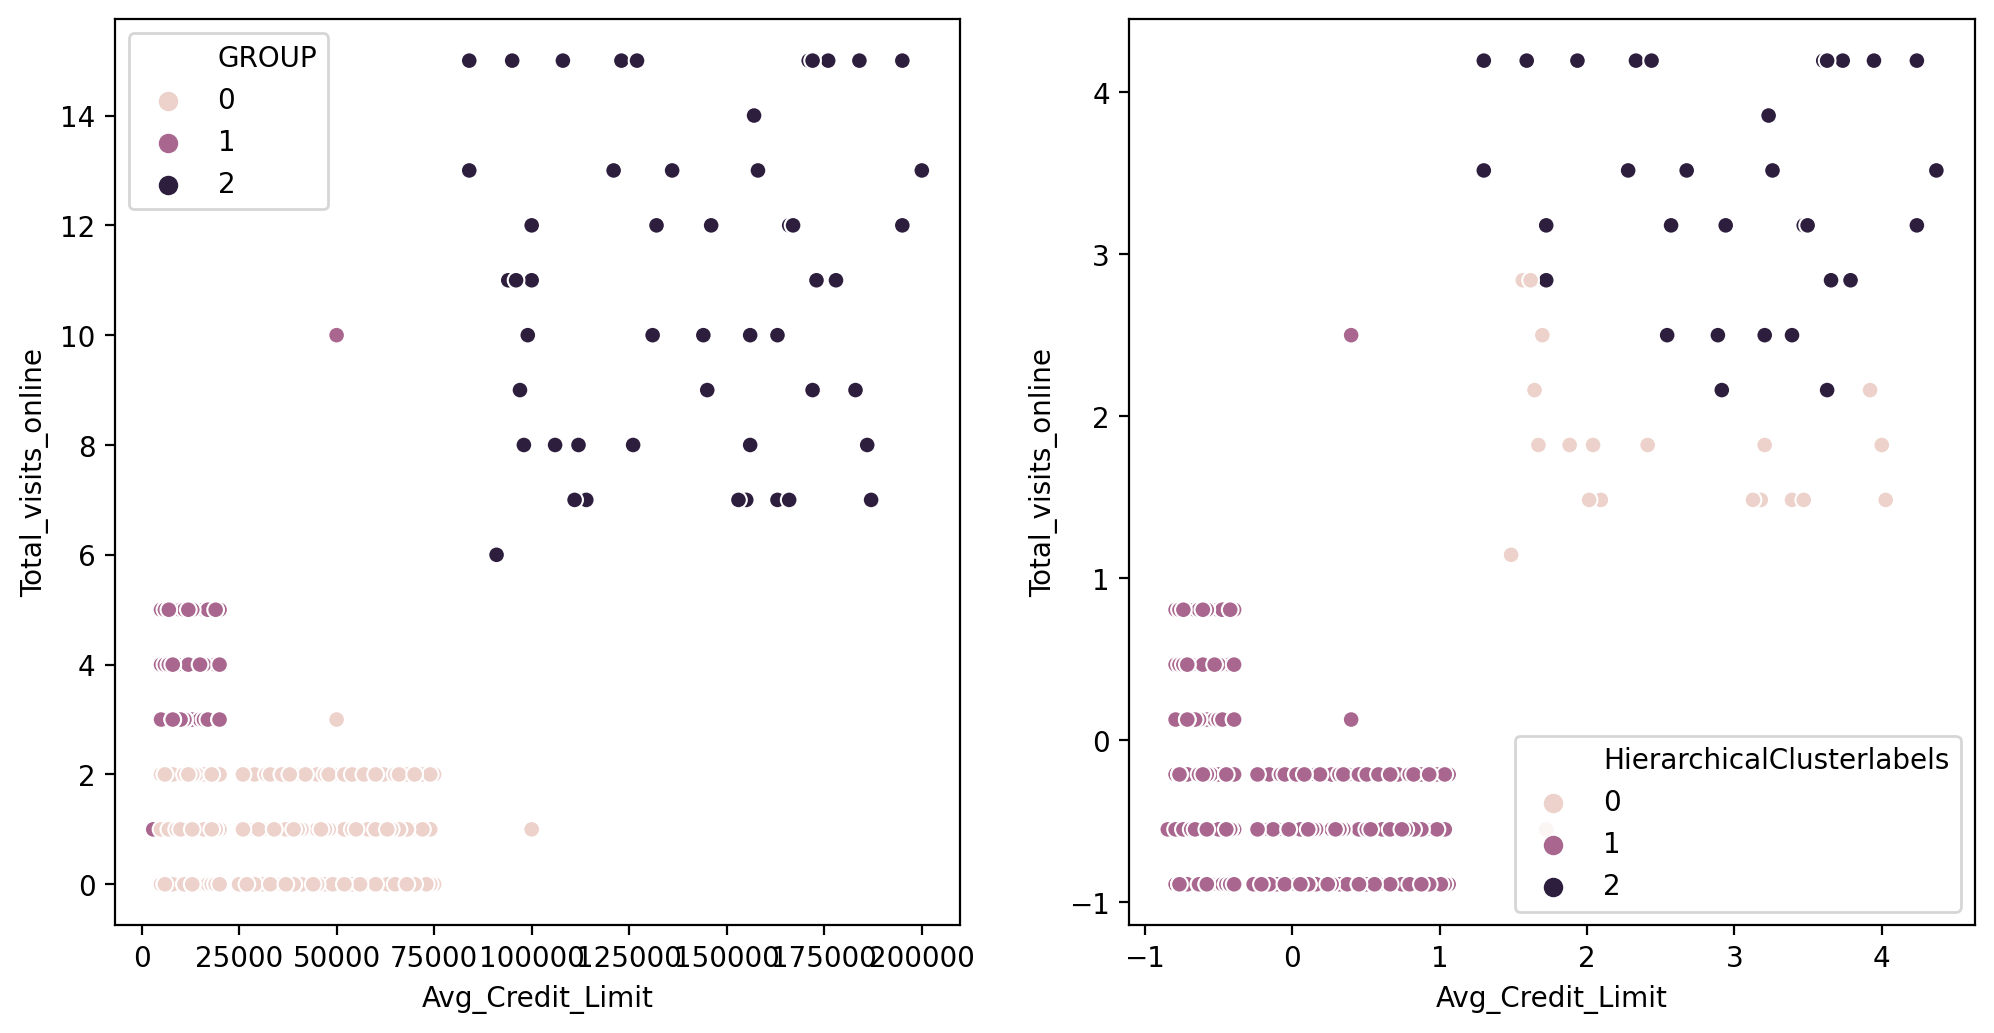

In [41]:
# scatter plot using the first two principal components to observe the cluster distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='Avg_Credit_Limit' , y='Total_visits_online',data=data_uselater,hue='GROUP')

plt.subplot(1,2,2)
sns.scatterplot(x='Avg_Credit_Limit', y='Total_visits_online',data=data_z_h,hue='HierarchicalClusterlabels')

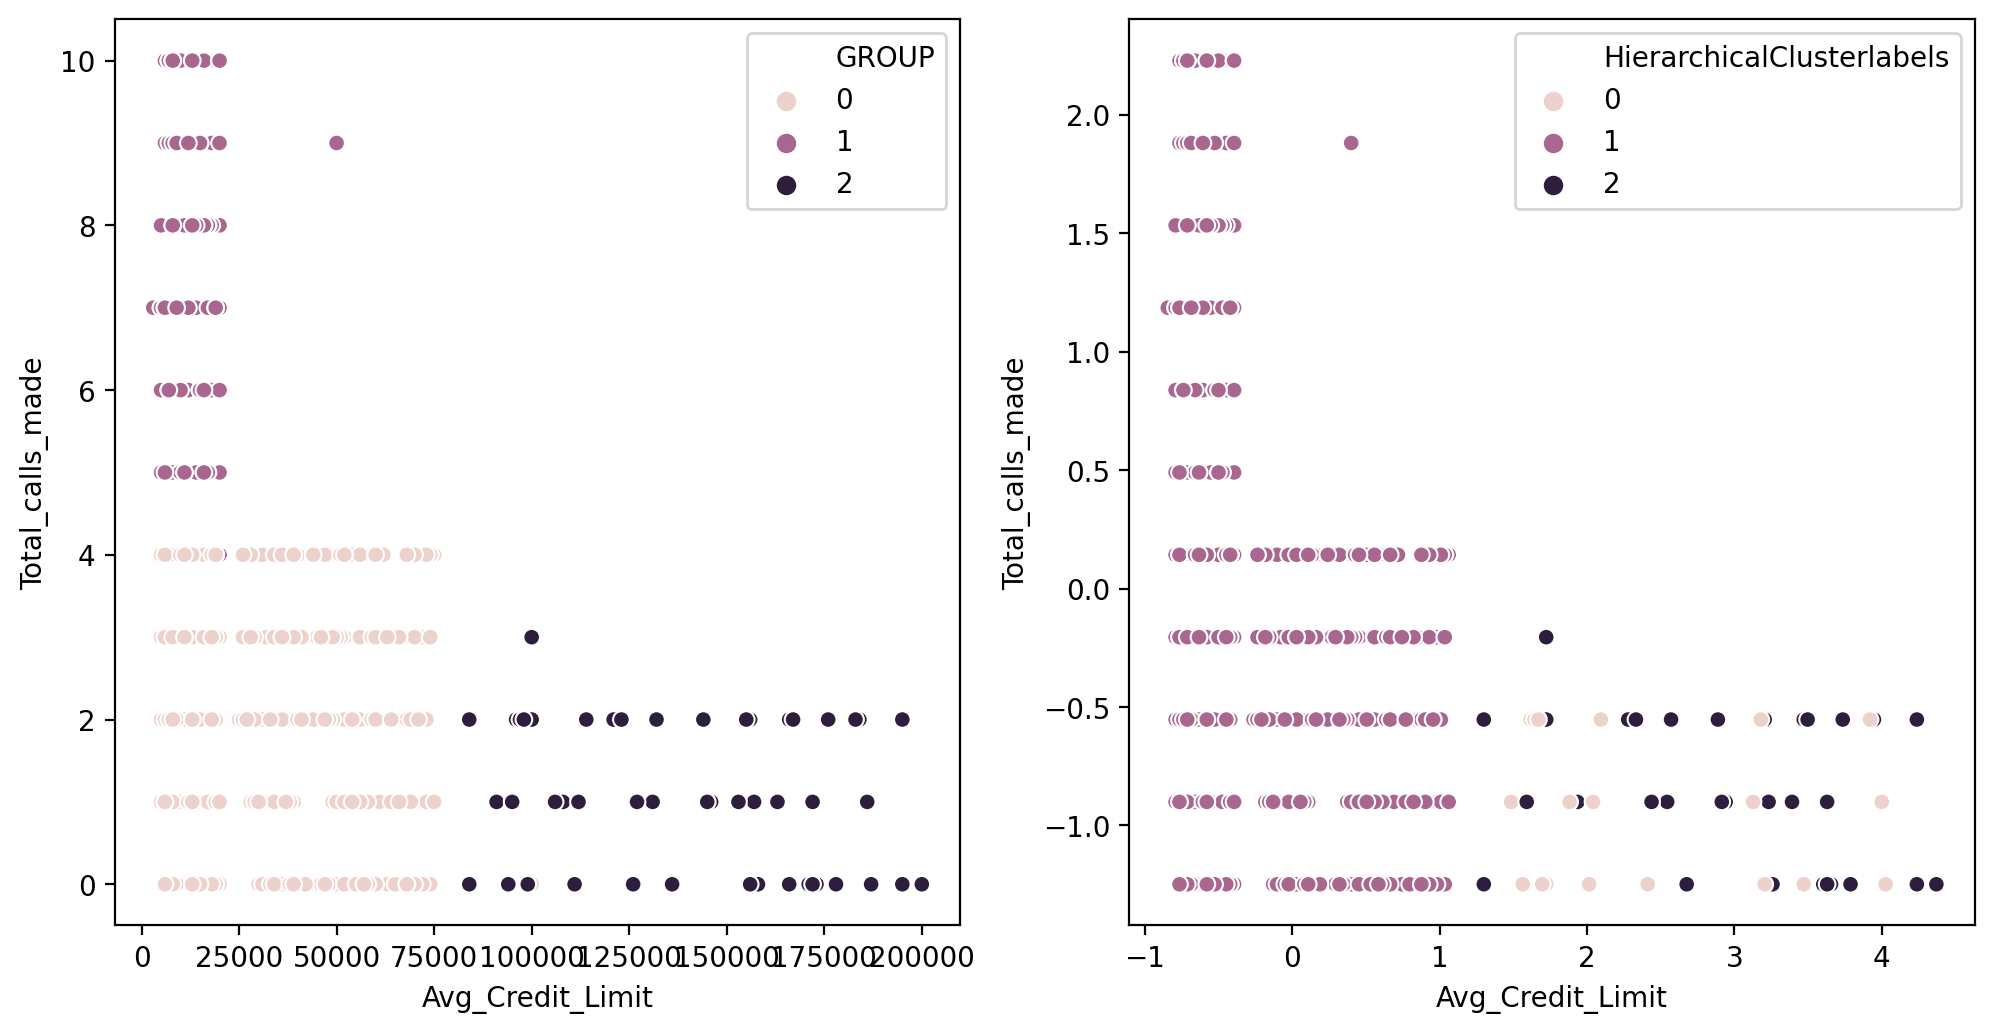

In [42]:
plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='Avg_Credit_Limit' , y='Total_calls_made',data=data_uselater,hue='GROUP')

plt.subplot(1,2,2)
sns.scatterplot(x='Avg_Credit_Limit', y='Total_calls_made',data=data_z_h,hue='HierarchicalClusterlabels')

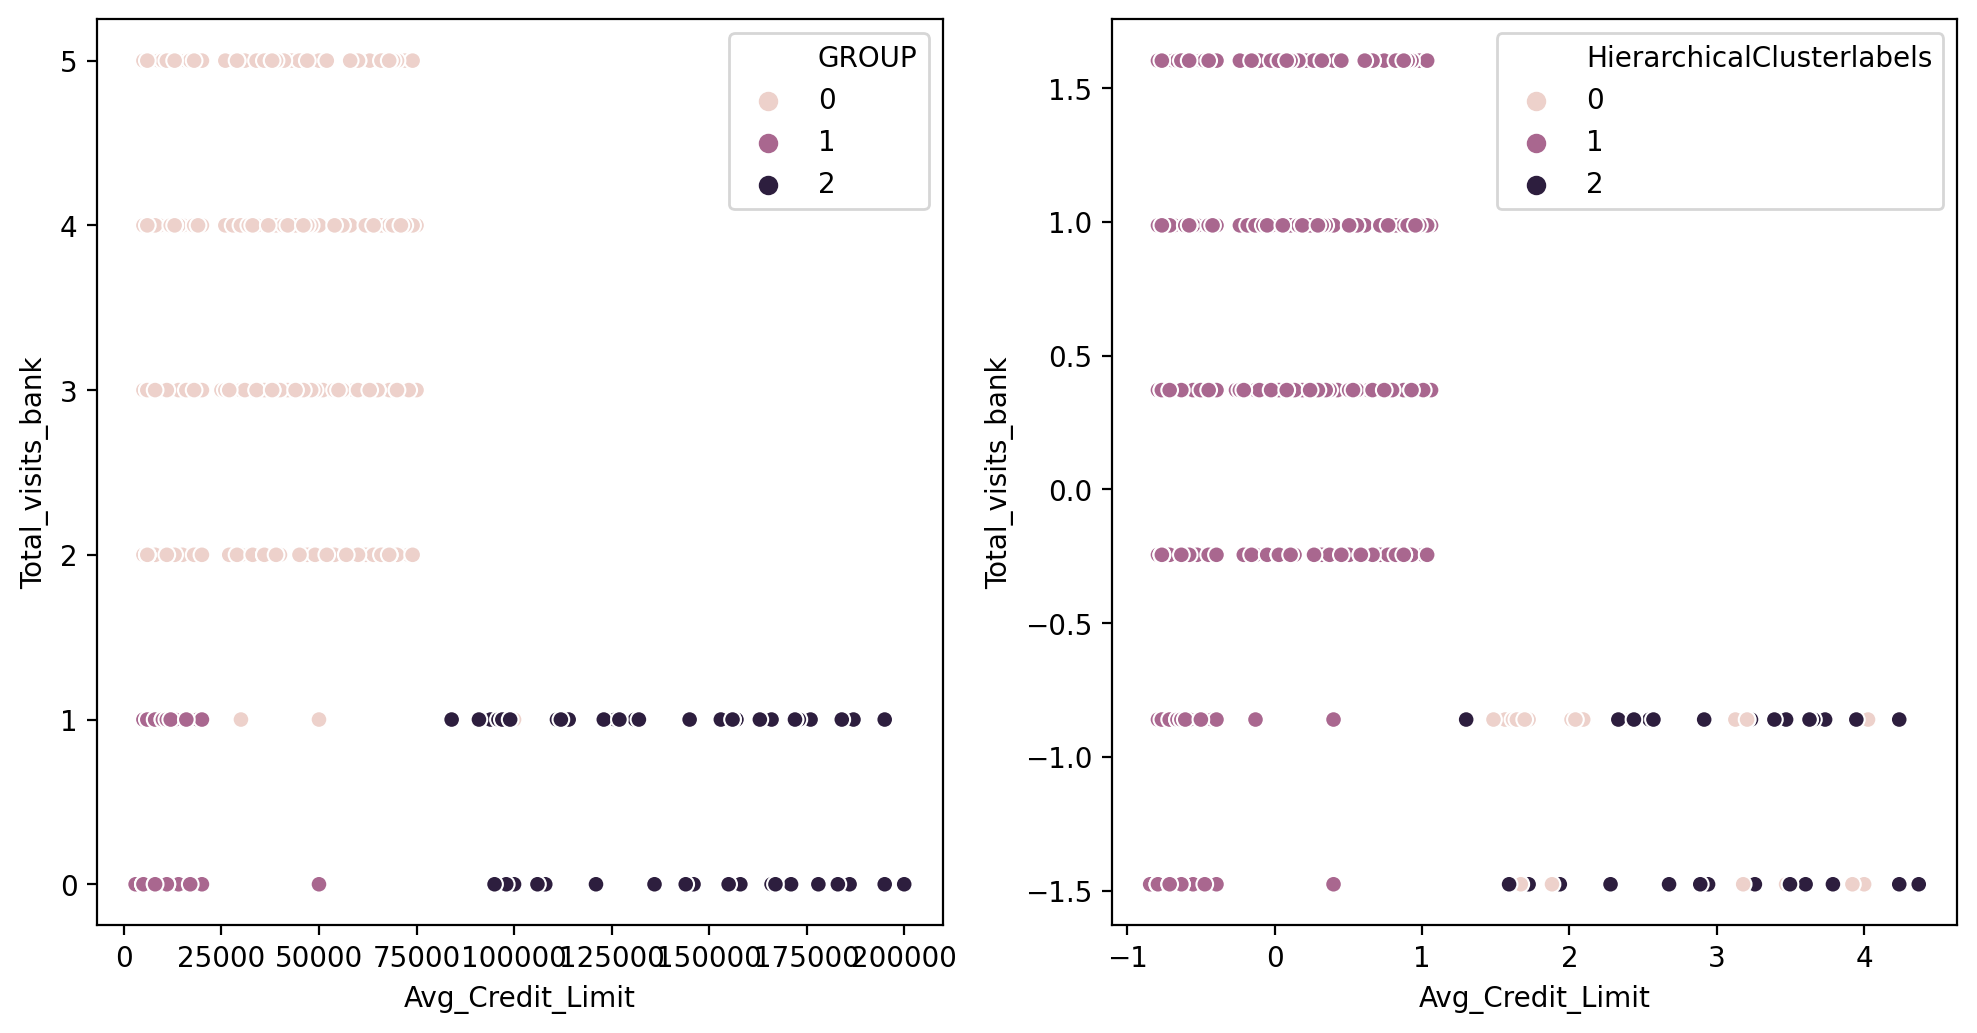

In [43]:
plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='Avg_Credit_Limit' , y='Total_visits_bank',data=data_uselater,hue='GROUP')

plt.subplot(1,2,2)
sns.scatterplot(x='Avg_Credit_Limit', y='Total_visits_bank',data=data_z_h,hue='HierarchicalClusterlabels')

### Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions. (10 marks)

##### How many different segments of customers are there?
Based on the analysis done the customers can be broadly segmented into three categories (Based On): <br />1. Avg Credit Card Limit, <br />2. The number of credit cards owned, <br />3. Customer interaction with customer services.

##### How are these segments different from each other?
These segments are different from each other based on their average credit limit, the number of credit cards owned, and customer interaction with bank's customer services.

##### What are your recommendations to the bank on how to better market to and service these customers?
1. Customers with the highest average credit limit prefer visiting online than visiting the bank and making phone calls. These folks will be benefited from having faster internet service. 
2. Cardholders having the least credit limit are frequently calling the bank, and they are also using internet service. They seems low income group and there is not much point marketing for them.
3. Average credit card limit holders are visiting the bank more often than other community. Bank need to offer them good rates and try to increase the credit limits.